## Mask R-CNN - Inspect Weights of a Trained Model

This notebook includes code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [24]:
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import keras

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
YCBV_MODEL_PATH = os.path.join(ROOT_DIR, "weights/mask_rcnn_ycbv_rgbd.h5")
# Download COCO trained weights from Releases if needed
# if not os.path.exists(COCO_MODEL_PATH):
#     utils.download_trained_weights(COCO_MODEL_PATH)

# Path to Shapes trained weights
# SHAPES_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_shapes.h5")

## Configurations

In [6]:
# Run one of the code blocks

# Shapes toy dataset
# import shapes
# config = shapes.ShapesConfig()

# MS COCO Dataset
import samples.YCB_Video.YCB_Video as ycbv
config = ycbv.YCBVConfig()


## Notebook Preferences

In [8]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

In [9]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Model

In [25]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# Set weights file path
if config.NAME == "shapes":
    weights_path = SHAPES_MODEL_PATH
elif config.NAME == "coco":
    weights_path = COCO_MODEL_PATH
elif config.NAME == "YCBV":
    weights_path = YCBV_MODEL_PATH
# Or, uncomment to load the last model you trained
# weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /home/christoph/Code/Python/Mask_RCNN/weights/mask_rcnn_ycbv_rgbd.h5


## Review Weight Stats

In [21]:
# Show stats of all trainable weights    
visualize.display_weight_stats(model)

WEIGHT NAME,SHAPE,MIN,MAX,STD
res1_conv_7/kernel:0,"(7, 7, 3, 64)",-0.0427,+0.0427,+0.0245
res1_conv_7/bias:0,"(64,)",+0.0000,+0.0000,+0.0000
bn_conv1_7/gamma:0,"(64,)",+0.0835,+2.6421,+0.5093
bn_conv1_7/beta:0,"(64,)",-2.3931,+5.3611,+1.9781
bn_conv1_7/moving_mean:0,"(64,)",-173.0470,+116.3013,+44.5654
bn_conv1_7/moving_variance:0*** Overflow?,"(64,)",+0.0000,+146335.3594,+21847.9668
res2a_branch2a_7/kernel:0,"(1, 1, 64, 64)",-0.6574,+0.3185,+0.0764
res2a_branch2a_7/bias:0,"(64,)",-0.0024,+0.0081,+0.0018
bn2a_branch2a_7/gamma:0,"(64,)",+0.2169,+1.8488,+0.4117
bn2a_branch2a_7/beta:0,"(64,)",-2.1180,+3.7329,+1.1786


# Histograms of Weights

TODO: cleanup this part

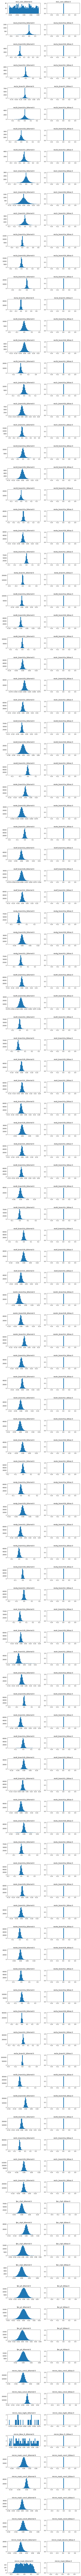

In [27]:
# Pick layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
# Get layers
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 50)


In [39]:
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
layers = model.get_trainable_layers()
print(layers[0].__class__.__name__)
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
print(layers)


Conv2D
[<keras.layers.convolutional.Conv2D object at 0x7fa008386198>, <keras.layers.convolutional.Conv2D object at 0x7fa03eb51dd8>, <keras.layers.convolutional.Conv2D object at 0x7fa03ede5160>, <keras.layers.convolutional.Conv2D object at 0x7fa03ee60a20>, <keras.layers.convolutional.Conv2D object at 0x7fa0ac0fb9e8>, <keras.layers.convolutional.Conv2D object at 0x7fa0ac187a90>, <keras.layers.convolutional.Conv2D object at 0x7fa0ac13dfd0>, <keras.layers.convolutional.Conv2D object at 0x7fa03b4c59e8>, <keras.layers.convolutional.Conv2D object at 0x7fa03b373780>, <keras.layers.convolutional.Conv2D object at 0x7fa0af773d68>, <keras.layers.convolutional.Conv2D object at 0x7fa0af79f4e0>, <keras.layers.convolutional.Conv2D object at 0x7fa0b405f940>, <keras.layers.convolutional.Conv2D object at 0x7fa0af7cc7b8>, <keras.layers.convolutional.Conv2D object at 0x7fa0b4111518>, <keras.layers.convolutional.Conv2D object at 0x7fa03fbea0b8>, <keras.layers.convolutional.Conv2D object at 0x7fa03b263f28>, 